In [1]:
import keras
from keras.layers import Conv2D, MaxPool2D, Flatten
from keras.layers import Dense, Dropout
from keras.datasets import fashion_mnist

import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    ## Accuracy
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
from __future__ import absolute_import, division, print_function

model = keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(keras.layers.MaxPooling2D(pool_size=2))
model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=2))
model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
__________

In [5]:
w, h = 28, 28
X_train = x_train.reshape([x_train.shape[0], 28, 28, 1])
X_test = x_test.reshape([x_test.shape[0], 28, 28, 1])
X_train = X_train/255
X_test = X_test/255
X_train.shape
X_test.shape

(10000, 28, 28, 1)

In [6]:
Y_train = keras.utils.np_utils.to_categorical(y_train)
Y_test = keras.utils.np_utils.to_categorical(y_test)

In [7]:
model.compile(keras.optimizers.Adam(1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
history = model.fit(X_train, y_train, validation_split=0.10, epochs=10)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 104s 2ms/step - loss: 0.9020 - acc: 0.6635 - val_loss: 0.5481 - val_acc: 0.7898
Epoch 2/10
54000/54000 [==============================] - 101s 2ms/step - loss: 0.5840 - acc: 0.7836 - val_loss: 0.4696 - val_acc: 0.8228
Epoch 3/10
54000/54000 [==============================] - 104s 2ms/step - loss: 0.5188 - acc: 0.8091 - val_loss: 0.4284 - val_acc: 0.8442
Epoch 4/10
54000/54000 [==============================] - 103s 2ms/step - loss: 0.4812 - acc: 0.8240 - val_loss: 0.3988 - val_acc: 0.8533
Epoch 5/10
54000/54000 [==============================] - 105s 2ms/step - loss: 0.4526 - acc: 0.8370 - val_loss: 0.3837 - val_acc: 0.8572
Epoch 6/10
54000/54000 [==============================] - 103s 2ms/step - loss: 0.4321 - acc: 0.8432 - val_loss: 0.3639 - val_acc: 0.8670
Epoch 7/10
54000/54000 [==============================] - 103s 2ms/step - loss: 0.4110 - acc: 0.8519 - val_loss: 0.3484 - v

In [9]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")

In [10]:
print(X_test.shape)
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test accuracy:', test_acc)

(10000, 28, 28, 1)
10000/10000 [==============================] - 4s 424us/step
Test accuracy: 0.8783


In [13]:
from keras.models import model_from_json

# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
loaded_model.summary()

Loaded model from disk
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)            

In [20]:
import coremltools
coreml_model = coremltools.converters.keras.convert(loaded_model,
                                                    input_names="image",
                                                    image_input_names="image",
                                                    image_scale=1/255.0,
                                                    class_labels=class_names)
coreml_model.save('armari_mnist.mlmodel')

0 : conv2d_1_input, <keras.engine.input_layer.InputLayer object at 0x1271b9090>
1 : conv2d_1, <keras.layers.convolutional.Conv2D object at 0x126d89310>
2 : conv2d_1__activation__, <keras.layers.core.Activation object at 0x127a07650>
3 : max_pooling2d_1, <keras.layers.pooling.MaxPooling2D object at 0x1271b9190>
4 : conv2d_2, <keras.layers.convolutional.Conv2D object at 0x1271b94d0>
5 : conv2d_2__activation__, <keras.layers.core.Activation object at 0x127a075d0>
6 : max_pooling2d_2, <keras.layers.pooling.MaxPooling2D object at 0x1271c42d0>
7 : flatten_1, <keras.layers.core.Flatten object at 0x1271c4d90>
8 : dense_1, <keras.layers.core.Dense object at 0x1272f5e50>
9 : dense_1__activation__, <keras.layers.core.Activation object at 0x129b5dcd0>
10 : dense_2, <keras.layers.core.Dense object at 0x12730d590>
11 : dense_2__activation__, <keras.layers.core.Activation object at 0x129b5d6d0>


(1, 28, 28)


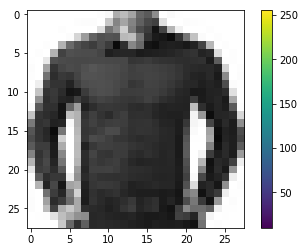

Bag
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


In [16]:
from PIL import Image

size = 28, 28
im = Image.open('bshirt.jpeg').convert('L')
im = im.resize(size, Image.ANTIALIAS)
imarray = np.array([np.array(im)])

plt.figure()
plt.imshow(im)
print(imarray.shape)
plt.colorbar()
plt.grid(False)
plt.show()

imarray = imarray.reshape(imarray.shape[0], w, h, 1)
predictions = loaded_model.predict(imarray)
predicted_label = np.argmax(predictions)
name = class_names[predicted_label]
print (name)
print (predictions)

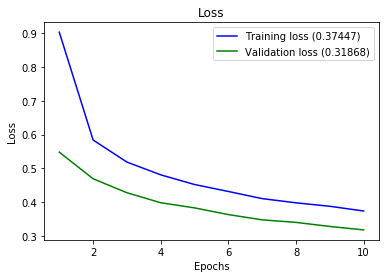

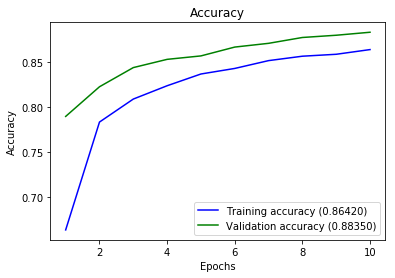

In [17]:
plot_history(history)